# Initial Set Up

In [2]:
!pip3 install fredapi


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [118]:
# basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# intializing api key

from fredapi import Fred
import json

with open('credentials.json') as f:
    fred_api_key = json.load(f)

fred_api_key = fred_api_key['fred_api_key']

In [6]:
# creating fred object
fred = Fred(api_key=fred_api_key)

# Get Economic Data

In [9]:
# searching for economic data
sp_search = fred.search('S&P', limit = 100, order_by='popularity')

In [10]:
sp_search.shape

(100, 15)

In [11]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-08-28,2024-08-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-08-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-27 08:43:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-08-28,2024-08-28,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-08-28,2024-08-28,S&P 500,2014-08-28,2024-08-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-08-27 19:11:19-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-08-28,2024-08-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-08-28,2024-08-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-08-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-27 08:43:15-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEHOINUSAZA672N,MEHOINUSAZA672N,2024-08-28,2024-08-28,Real Median Household Income in Arizona,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:08-05:00,27,Household data are collected as of March. Con...
DDDM01INA156NWDB,DDDM01INA156NWDB,2024-08-28,2024-08-28,Stock Market Capitalization to GDP for India,2000-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:03-05:00,27,Total value of all listed shares in a stock ma...
SEXRHTNSA,SEXRHTNSA,2024-08-28,2024-08-28,"Home Price Index (High Tier) for Seattle, Wash...",1990-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:11:53-05:00,27,"For more information regarding the index, plea..."


In [12]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

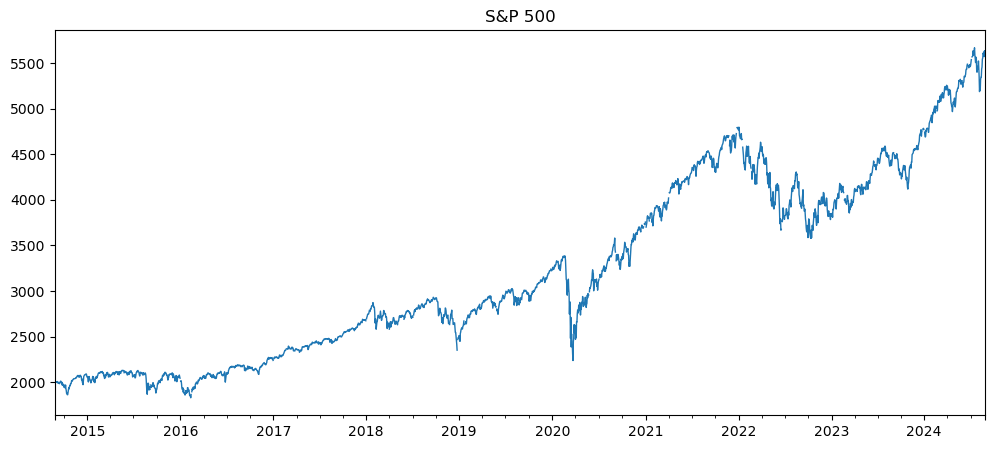

In [13]:
sp500.plot(figsize=(12, 5), title = 'S&P 500', lw=1)

## Pulling Data of Unemployment Per State

In [15]:
unemp_search = fred.search('unemployment', limit=100, order_by='popularity')

In [16]:
unemp_df = fred.search('unemployment rate states', filter=('frequency', 'Monthly'), limit=100, order_by='popularity')
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [32]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-08-28,2024-08-28,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-08-28,2024-08-28,Unemployment Rate - Black or African American,1972-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-08-28,2024-08-28,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
TXUR,TXUR,2024-08-28,2024-08-28,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None
LNS14000024,LNS14000024,2024-08-28,2024-08-28,Unemployment Rate - 20 Yrs. & over,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:08-05:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2024-08-28,2024-08-28,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:08-05:00,56,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-08-28,2024-08-28,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
U2RATE,U2RATE,2024-08-28,2024-08-28,Unemployment Rate - Job Losers (U-2),1967-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:10-05:00,53,The series comes from the 'Current Population ...
NYUR,NYUR,2024-08-28,2024-08-28,Unemployment Rate in New York,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:02-05:00,53,None


In [17]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'LNS14000024', 'LNS14000031',
       'M0892AUSM156SNBR', 'U2RATE', 'NYUR', 'FLUR', 'LNS14000002',
       'LNS14000009', 'LNS14000003', 'PAUR', 'LNS14000001', 'OHUR',
       'LNS14027660', 'LNS14027662', 'MIUR', 'LNS14024887', 'ALUR', 'MAUR',
       'GAUR', 'NCUR', 'COUR', 'WIUR', 'AZUR', 'VAUR', 'ILUR', 'SCUR',
       'LNS14000012', 'WAUR', 'TNUR', 'LNS14027659', 'ORUR', 'WVUR', 'MDUR',
       'NMUR', 'NVUR', 'MNUR', 'OKUR', 'ARUR', 'INUR', 'MOUR', 'AKUR', 'LAUR',
       'IAUR', 'UTUR', 'NDUR', 'HIUR'],
      dtype='object', name='series id')

In [36]:
unemp_id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': 'California',
 'TXUR': 'Texas',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': 'Pennsylvania',
 'LNS14000001': 'Unemployment Rate - Men',
 'OHUR': 'Ohio',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'MIUR': 'Michigan',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'GAUR': 'Georgia',
 'NCUR': 'North Carolina',
 

In [44]:
all_results = []

for idx in unemp_df.index:
    results = fred.get_series(idx)
    if 'Unemployment' in unemp_id_to_state[idx]: continue
    df = results.to_frame(name = unemp_id_to_state[idx])
    all_results.append(df)

In [45]:
unemp_results = pd.concat(all_results, axis=1)
unemp_results

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Georgia,...,Oklahoma,Arkansas,Indiana,Missouri,Alaska,Louisiana,Iowa,Utah,North Dakota,Hawaii
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.8,3.4,9.8
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.9,3.4,9.8
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.5,5.9,7.0,6.3,4.3,5.8,3.4,9.8
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,8.3,...,5.8,7.2,6.3,6.0,6.9,6.4,4.2,5.8,3.5,9.7
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,8.1,...,5.7,7.1,6.0,6.0,6.9,6.5,4.1,5.7,3.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.1,...,3.5,3.5,3.5,3.3,4.6,4.4,2.9,2.8,2.0,3.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.1,...,3.5,3.4,3.6,3.4,4.6,4.3,2.8,2.8,2.0,3.1
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.2,...,3.5,3.4,3.7,3.5,4.5,4.1,2.8,2.9,2.0,3.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.3,...,3.4,3.3,3.8,3.7,4.5,4.0,2.8,3.0,2.1,2.9


In [84]:
unemp_states = unemp_results
unemp_states = unemp_states.dropna()
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Georgia,...,Oklahoma,Arkansas,Indiana,Missouri,Alaska,Louisiana,Iowa,Utah,North Dakota,Hawaii
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.8,3.4,9.8
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.9,3.4,9.8
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,8.4,...,5.8,7.3,6.5,5.9,7.0,6.3,4.3,5.8,3.4,9.8
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,8.3,...,5.8,7.2,6.3,6.0,6.9,6.4,4.2,5.8,3.5,9.7
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,8.1,...,5.7,7.1,6.0,6.0,6.9,6.5,4.1,5.7,3.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.1,...,3.5,3.5,3.5,3.3,4.6,4.4,2.9,2.8,2.0,3.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.1,...,3.5,3.4,3.6,3.4,4.6,4.3,2.8,2.8,2.0,3.1
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.2,...,3.5,3.4,3.7,3.5,4.5,4.1,2.8,2.9,2.0,3.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.3,...,3.4,3.3,3.8,3.7,4.5,4.0,2.8,3.0,2.1,2.9


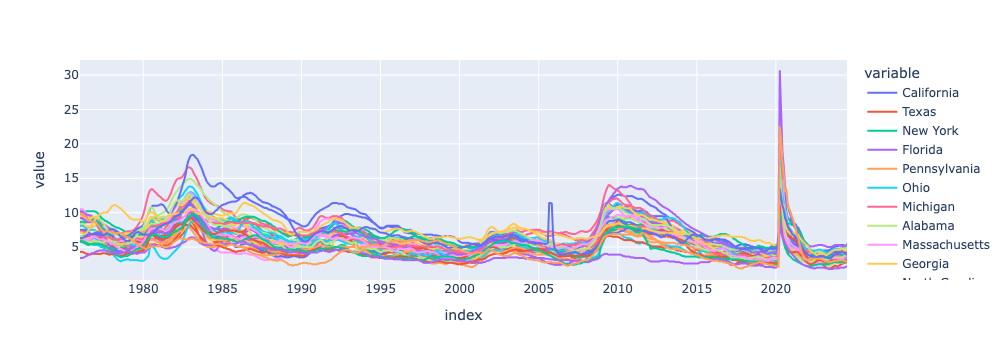

In [86]:
px.line(unemp_states)

## Pull Data of January 2024 Unemployment Per State

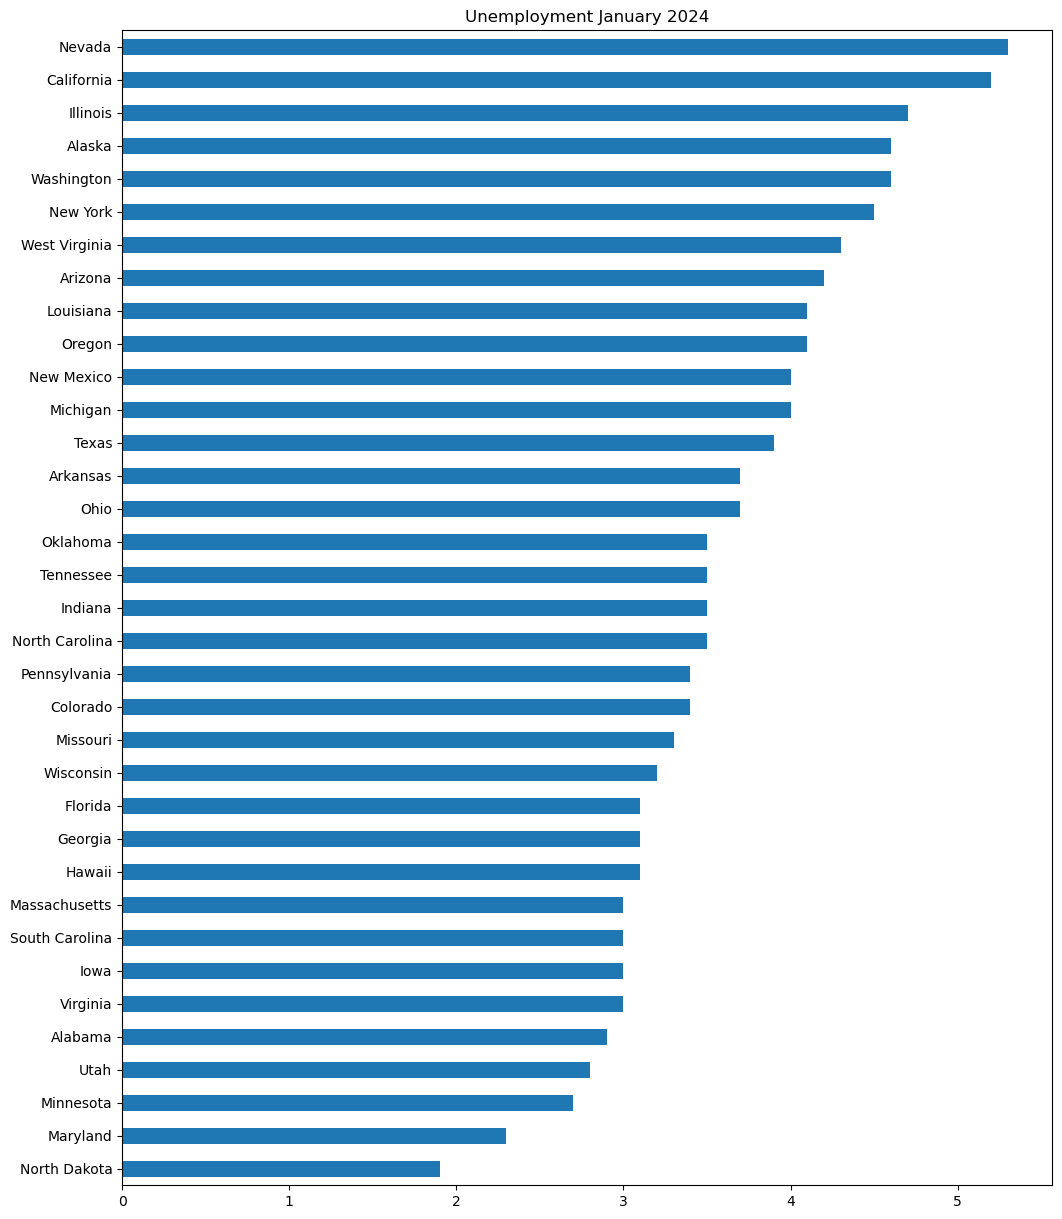

In [88]:
ax = unemp_states.loc[unemp_states.index == '2024-01-01'].T \
    .sort_values('2024-01-01') \
    .plot(kind='barh', figsize=(12, 15), title='Unemployment January 2024')
ax.legend().remove()
plt.show()

In [52]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

## Pulling Data of Participation Rate per State

In [148]:
part_df = fred.search('participation rate states', filter=('frequency', 'Monthly'), limit=100, order_by='popularity')
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [149]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25MAUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25FEUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Participation Rate - 20 Yrs. & over, Black

In [152]:
all_results = []

for idx in part_df.index:
    results = fred.get_series(idx)
    if 'Labor Force Participation Rate' in part_id_to_state[idx]: continue
    df = results.to_frame(name = part_id_to_state[idx])
    all_results.append(df)

In [153]:
part_states = pd.concat(all_results, axis=1)

In [162]:
len(part_states.columns)

43

In [70]:
len(unemp_states.columns)

35

In [164]:
part_states.columns

Index(['New York', 'Michigan', 'Mississippi', 'California', 'Texas',
       'Kentucky', 'Florida', 'Wisconsin', 'Pennsylvania', 'Massachusetts',
       'West Virginia', 'Minnesota', 'Maryland', 'Maine', 'Tennessee', 'Utah',
       'North Carolina', 'Virginia', 'Illinois', 'Indiana', 'Ohio', 'Alabama',
       'Missouri', 'Georgia', 'New Jersey', 'Louisiana', 'Iowa', 'Arizona',
       'New Mexico', 'Alaska', 'Oklahoma', 'Nebraska', 'Idaho', 'Montana',
       'Oregon', 'South Carolina', 'Colorado', 'North Dakota', 'Connecticut',
       'Kansas', 'New Hampshire', 'South Dakota', 'Arkansas'],
      dtype='object')

In [166]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'Georgia', 'North Carolina',
       'Colorado', 'Wisconsin', 'Arizona', 'Virginia', 'Illinois',
       'South Carolina', 'Washington', 'Tennessee', 'Oregon', 'West Virginia',
       'Maryland', 'New Mexico', 'Nevada', 'Minnesota', 'Oklahoma', 'Arkansas',
       'Indiana', 'Missouri', 'Alaska', 'Louisiana', 'Iowa', 'Utah',
       'North Dakota', 'Hawaii'],
      dtype='object')

In [188]:
for idx in part_states.columns:
    if idx not in unemp_states.columns:
        print(idx)
        del part_states[idx]

Mississippi
Kentucky
Maine
New Jersey
Nebraska
Idaho
Montana
Connecticut
Kansas
New Hampshire
South Dakota


In [194]:
for idx in unemp_states.columns:
    if idx not in part_states.columns:
        print(idx)
        del unemp_states[idx]

Washington
Nevada
Hawaii


In [192]:
len(part_states.columns)

32

In [196]:
len(unemp_states.columns)

32

## Unemployment vs Participation

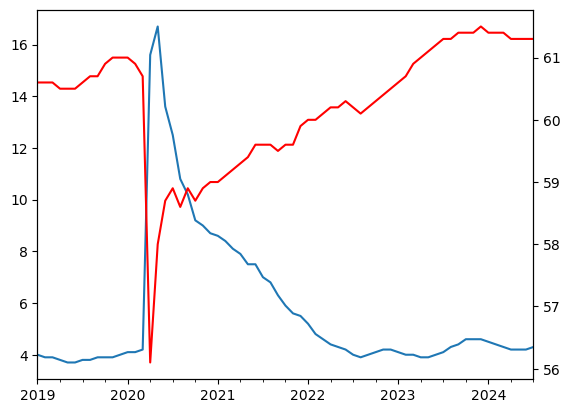

In [208]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2019')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2019')['New York'].plot(ax=ax2, label='Participation', color='r')
plt.show()